# **Desafios de API**

###***Consulte as documentações, faça testes e capriche no seu código!***


### **Desafio 1**

Você foi contratado para criar um programa em Python que permita o envio de mensagens SMS usando a API do Twilio. Seu programa deve solicitar ao usuário que insira o número de telefone de destino e a mensagem que deseja enviar. Em seguida, ele deve usar a API do Twilio para enviar a mensagem SMS para o número especificado. Certifique-se de configurar corretamente as credenciais da sua conta do Twilio no programa para que ele possa autenticar e enviar as mensagens com sucesso. Além disso, forneça feedback ao usuário sobre o status do envio da mensagem.

In [6]:
from twilio.rest import Client

account_sid = "AC10b298fcf30ed2dd19b571cc9d94aa23"

auth_token = "1bf5352aceaa5de3eb4a3656fcd02877"

client = Client(account_sid, auth_token)

telefone_dest = input("Digite o número de telefone de destino:")
#Como só consigo enviar para meu número por ser uma conta trial, o input acima se inutiliza
telefone_dest = "+5511977020912"
client_message = input("Digite a mensagem que deseja enviar aqui:")

try:
    message = client.messages.create(
        to = telefone_dest,
        from_="+18325147987",
        body = client_message
    )
    print("Mensagem enviada com sucesso!")
except:
    print("Mensagem não enviada devido a erro de conexão")

print(message.sid)


SMccfd39128f3ee4f93c037b111833529c


### **Desafio 2**

Você foi designado para criar um programa em Python que forneça informações de cotação atual e gráficos históricos para o dólar, euro e bitcoin. O programa deve apresentar um menu com duas opções: "Cotação Atual" e "Gráfico Histórico". Ao selecionar "Cotação Atual", o programa deverá exibir as cotações atualizadas do dólar, euro e bitcoin obtidas através da API CoinGecko, da API economia.awesomeapi.com.br (conforme exemplo no slide da aula) ou de outra fonte de dados de sua preferência.

Ao escolher "Gráfico Histórico", o programa deve perguntar ao usuário qual moeda ele deseja visualizar (Dólar/Euro/Bitcoin) e, em seguida, obter e imprimir o gráfico de evolução histórica real dessa moeda desde janeiro de 2023 até outubro de 2023, utilizando a API escolhida.

Embora o uso de uma interface gráfica não seja obrigatório, é altamente desejável como um desafio extra. Você pode optar por criar uma interface gráfica para tornar o programa mais amigável e interativo. Certifique-se de que o programa seja intuitivo e forneça informações claras e atualizadas ao usuário.

Para a implementação do programa, serão necessárias as seguintes bibliotecas:

 - requests para fazer buscar os dados de cotação
 - matplotlib para fazer os gráficos
 - *tkinter (opcional)* para criar uma interface gráfica, tornando a interação com o programa mais amigável.


{'USD': '5.1658', 'BTC': '141981', 'EUR': '5.3981'}
[5.1623, 5.1623, 5.1666, 5.1628, 5.1638, 5.1628, 5.1628, 5.1653, 5.1681, 5.1658]
10


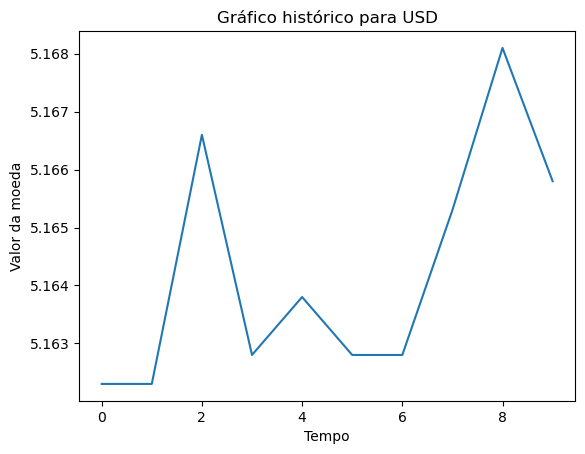

[141948.0, 141948.0, 141971.0, 142127.0, 142062.0, 141927.0, 141927.0, 141927.0, 141927.0, 142046.0]
10


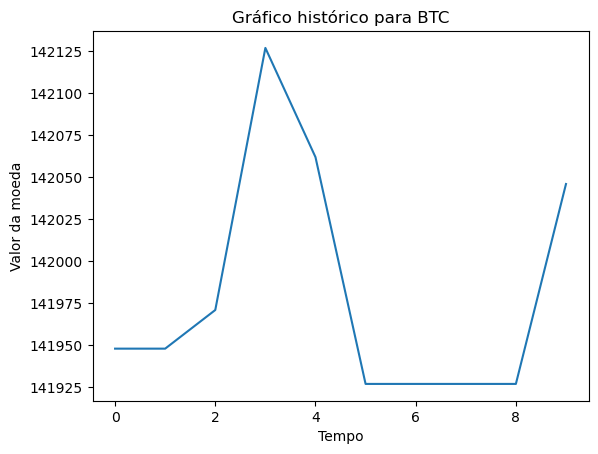

[5.3981, 5.3981, 5.3981, 5.3981, 5.3981, 5.3981, 5.3981, 5.3981, 5.3981, 5.3981]
10


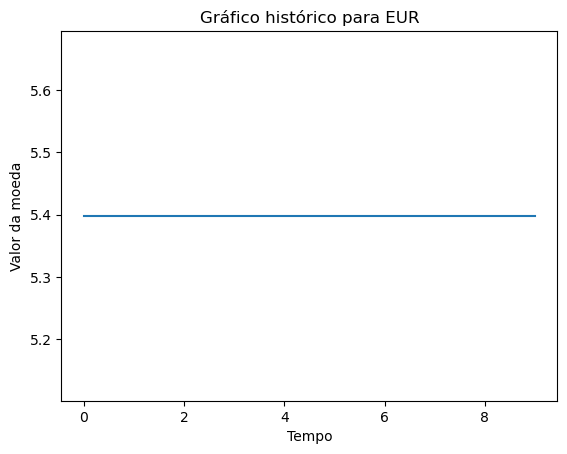

In [59]:
import requests
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import json

#variables
cotacao_atual = {}
graf_historico = {}
siglas = ['USD', 'BTC', 'EUR']

#API
cotacoes = requests.get("https://economia.awesomeapi.com.br/json/all")
cotacoes_dict = cotacoes.json()

# API graf historico
def grafico_evo_hist_function(sigla):
    graf_historico = requests.get(f"https://economia.awesomeapi.com.br/{sigla}/10?startdate=20230101&enddate=20231005")
    graf_historico_dict = graf_historico.json()
    lista_graf_historico = [float(item['bid']) for item in graf_historico_dict]
    lista_graf_historico.reverse()
    print(lista_graf_historico)
    print(len(lista_graf_historico))
    #matplotlib
    plt.plot(lista_graf_historico)
    plt.xlabel('Tempo')
    plt.ylabel('Valor da moeda')
    plt.title(f'Gráfico histórico para {sigla}')
    plt.show()

# função matplot graf historico

def grafico_historico():
    option = caixa_selecao2.get()

    if option == siglas[0]:
        grafico_evo_hist_function(siglas[0])
    elif option == siglas[1]:
        grafico_evo_hist_function(siglas[1])
    elif option == siglas[2]:
        grafico_evo_hist_function(siglas[2])


#função main API

def mostrar_opcao_selecionada():
    opcao = caixa_selecao.get()
    mensagem = f"Opção selecionada: {opcao}"
    messagebox.showinfo("Opção Selecionada", mensagem)

    if opcao == opcoes[0]:
        #mostrar cotação
        dados_from_API()
        messagebox.showinfo(title='Cotação atual', message=cotacao_atual,)
    elif opcao == opcoes[1]:
        #mostrar gráfico histórico
        janela.destroy()
        janela_option_2 = tk.Tk()
        janela_option_2.title('Gráfico Histórico')
        janela_option_2.geometry("400x150")
        global caixa_selecao2
        caixa_selecao2 = tk.StringVar()
        caixa_selecao2.set(siglas[0])
        menu_siglas_graf_historico = tk.OptionMenu(janela_option_2, caixa_selecao2, *siglas)
        menu_siglas_graf_historico.config(width= 12)
        menu_siglas_graf_historico.pack(pady=30, ipadx=10)
        botao2 = tk.Button(janela_option_2, text="OK", command=grafico_historico)
        botao2.place(width=100, height=25 ,x=150, y=75)

#tkinter
janela = tk.Tk()
janela.title('API de cotação atual e gráfico histórico')
janela.geometry("400x150")
janela.resizable(False, False)

opcoes = ["Cotação Atual", "Gráfico Histórico"]
caixa_selecao = tk.StringVar()
caixa_selecao.set(opcoes[0])

#botão combobox
menu = tk.OptionMenu(janela, caixa_selecao, *opcoes)
menu.config(width= 12)
menu.pack(pady=30, ipadx=10)

#botão OK
botao = tk.Button(janela, text="OK", command=mostrar_opcao_selecionada)
botao.place(width=100, height=25 ,x=150, y=75)


#Função Cotação atual: get only values I want from 'siglas'
def dados_from_API():
    for par, dado in cotacoes_dict.items():
        for sigla in siglas:
            if par == sigla:
                cotacao_atual[par] = dado['bid']
    print(cotacao_atual)



dados_from_API()

tk.mainloop()

### **Desafio 3**

Você foi designado para criar um programa em Python que permita o cadastro de clientes de forma eficiente e precisa. Para agilizar o processo de preenchimento do endereço dos clientes, você decidiu implementar uma funcionalidade que utiliza a API ViaCEP dos Correios para buscar automaticamente os dados do endereço (rua, bairro, cidade, estado, etc.) com base no CEP fornecido pelo usuário.

Sua tarefa é criar um programa que ofereça a funcionalidade de busca de endereço por CEP, onde o usuário possa inserir o CEP e obter automaticamente os dados do endereço. Em seguida, o usuário preenche os demais dados e grava o resgitro.

O programa tambem deve ter uma funcionalidade de listar os cadastros.

Embora o uso de uma interface gráfica não seja obrigatório, é altamente desejável como um desafio extra. Você pode optar por criar uma interface gráfica para tornar o programa mais amigável e interativo. Certifique-se de que o programa seja intuitivo e forneça informações claras e atualizadas ao usuário.

Para a implementação do programa, serão necessárias as seguintes bibliotecas:

 - requests para fazer solicitações à API ViaCEP.
 - *tkinter (opcional)* para criar uma interface gráfica, tornando a interação com o programa mais amigável.
